# Customer Dataset Preprocessing

In [2]:
import pandas as pd
df = pd.read_excel("Online_Retail.xlsx")
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
370610,569143,23169,CLASSIC GLASS COOKIE JAR,3,2011-09-30 15:04:00,4.15,15867.0,United Kingdom
356482,568054,21231,SWEETHEART CERAMIC TRINKET BOX,2,2011-09-23 12:50:00,1.25,16978.0,United Kingdom
165600,550819,22842,BISCUIT TIN VINTAGE RED,1,2011-04-20 17:37:00,6.75,17530.0,United Kingdom
437003,574258,21311,SET/4 BIRD MIRROR MAGNETS,1,2011-11-03 13:50:00,0.29,16891.0,United Kingdom
456723,575706,21495,SKULLS AND CROSSBONES WRAP,25,2011-11-10 17:13:00,0.42,14713.0,United Kingdom
221742,556267,15036,ASSORTED COLOURS SILK FAN,600,2011-06-09 19:33:00,0.72,13694.0,United Kingdom
97122,544599,22282,12 EGG HOUSE PAINTED WOOD,1,2011-02-21 18:15:00,24.96,NaN,United Kingdom
437918,574298,22133,PINK LOVE HEART SHAPE CUP,1,2011-11-03 15:56:00,1.63,NaN,United Kingdom
420242,572882,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-10-26 13:36:00,1.65,18226.0,United Kingdom
59574,541293,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,2,2011-01-17 13:39:00,1.95,15311.0,United Kingdom


## Removing NaN Values

In [26]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
col = ['Description', 'CustomerID']
df.dropna(subset = col, inplace = True)
df.reset_index(drop = True, inplace = True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [28]:
dup = df.duplicated(subset = 'InvoiceNo' , keep = False)
dup.sum()

403434

## Removing Rows with Non - Positive Quantity or UnitPrice Values

In [28]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


## Removing Outliers

In [29]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [30]:
max = df['Quantity'].quantile(0.999)
min = df['Quantity'].quantile(0.01)
m = (df['Quantity'] > min) & (df['Quantity'] < max)
df = df[m]

In [31]:
max1 = df['UnitPrice'].quantile(0.999)
min1 = df['UnitPrice'].quantile(0.01)
m1 = (df['UnitPrice'] > min1) & (df['UnitPrice'] < max1)
df = df[m1]

In [32]:
df.reset_index(inplace = True, drop = True)
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,377467.000000,377467,377467.000000,319916.000000
mean,12.409461,2011-07-06 17:37:20.158583552,2.767461,15198.828146
min,2.000000,2010-12-01 08:26:00,0.220000,12347.000000
25%,3.000000,2011-03-31 13:43:00,1.250000,13767.000000
50%,6.000000,2011-07-24 10:30:00,1.950000,15051.000000
75%,12.000000,2011-10-18 13:26:00,3.750000,16717.000000
max,448.000000,2011-12-09 12:50:00,25.000000,18287.000000
std,24.377505,NaN,2.691293,1714.705551


In [34]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
290154,572442,23434,3 RAFFIA RIBBONS 50'S CHRISTMAS,10,2011-10-24 12:09:00,0.79,12546.0,Spain
248868,568095,90185C,BLACK DIAMANTE EXPANDABLE RING,6,2011-09-23 14:49:00,4.25,14911.0,EIRE
44545,541978,15056BL,EDWARDIAN PARASOL BLACK,3,2011-01-24 14:46:00,5.95,13551.0,United Kingdom
362877,580188,22905,CALENDAR IN SEASON DESIGN,6,2011-12-02 12:02:00,1.25,16440.0,United Kingdom
39811,541497,21620,SET OF 4 ROSE BOTANICAL CANDLES,2,2011-01-18 15:19:00,2.46,NaN,United Kingdom
260399,569253,23090,VINTAGE GLASS T-LIGHT HOLDER,12,2011-10-03 10:55:00,0.83,13635.0,United Kingdom
53582,543250,84991,60 TEATIME FAIRY CAKE CASES,24,2011-02-04 14:46:00,0.55,13911.0,United Kingdom
278005,571197,84836,ZINC METAL HEART DECORATION,4,2011-10-14 12:08:00,1.25,16413.0,United Kingdom
265466,569728,23213,STAR WREATH DECORATION WITH BELL,12,2011-10-06 09:38:00,1.25,15416.0,United Kingdom
261810,569407,23493,VINTAGE DOILY TRAVEL SEWING KIT,10,2011-10-04 09:12:00,1.95,15694.0,United Kingdom


## Adding months column

In [35]:
df['InvoiceDate'].sample(5)

345661   2011-11-23 12:39:00
183722   2011-07-18 15:56:00
131089   2011-05-17 14:43:00
210650   2011-08-18 12:53:00
313815   2011-11-08 09:29:00
Name: InvoiceDate, dtype: datetime64[ns]

In [36]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
220159,564825,23322,LARGE WHITE HEART OF WICKER,5,2011-08-30 12:26:00,2.95,NaN,United Kingdom,8
152900,556484,22396,MAGNETS PACK OF 4 RETRO PHOTO,2,2011-06-12 13:17:00,1.25,16938.0,United Kingdom,6
232183,566283,21207,SKULL AND CROSSBONES GARLAND,6,2011-09-11 14:34:00,1.65,17838.0,United Kingdom,9
157873,557217,22951,60 CAKE CASES DOLLY GIRL DESIGN,24,2011-06-17 12:30:00,0.55,17426.0,United Kingdom,6
186844,560827,82484,WOOD BLACK BOARD ANT WHITE FINISH,2,2011-07-21 11:42:00,7.95,14517.0,United Kingdom,7
207298,563256,23266,SET OF 3 WOODEN STOCKING DECORATION,12,2011-08-15 12:07:00,1.25,18143.0,United Kingdom,8
192673,561534,22439,6 ROCKET BALLOONS,24,2011-07-28 09:45:00,0.65,14307.0,United Kingdom,7
246385,567868,23396,LA JARDIN BOTANIQUE CUSHION COVER,4,2011-09-22 14:18:00,3.75,17603.0,United Kingdom,9
333651,576932,21621,VINTAGE UNION JACK BUNTING,3,2011-11-17 11:12:00,8.50,15443.0,United Kingdom,11
198667,562276,22383,LUNCH BAG SUKI DESIGN,10,2011-08-04 10:23:00,1.65,17735.0,United Kingdom,8


## Dropping Unwanted Columns

In [37]:
col_drop = ['Description' , 'InvoiceDate']
df.drop(columns = col_drop, inplace = True)
df.sample(10)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month
231308,566239,21175,12,2.55,14665.0,United Kingdom,9
160254,557494,22055,3,3.29,NaN,United Kingdom,6
164500,558085,21936,5,2.95,13021.0,United Kingdom,6
244029,567653,22389,6,2.55,12550.0,Spain,9
243838,567630,23433,12,0.83,15737.0,United Kingdom,9
175840,559506,20717,2,2.46,NaN,United Kingdom,7
314051,574961,22595,12,0.85,12971.0,United Kingdom,11
137725,554325,84086C,6,2.95,12621.0,Germany,5
78232,546406,22548,3,1.25,NaN,United Kingdom,3
334289,577038,21810,12,0.39,14796.0,United Kingdom,11


## Saving Model for EDA

In [38]:
df.to_csv('cust_seg_EDA1.csv', index=False)

## Replacing Country Names by Numbers

In [39]:
df['Country'].value_counts()

Country
United Kingdom          335204
Germany                   8672
France                    7962
EIRE                      7545
Spain                     2164
Netherlands               2159
Belgium                   1963
Switzerland               1859
Portugal                  1355
Australia                 1117
Norway                    1027
Channel Islands            738
Italy                      708
Finland                    641
Cyprus                     494
Sweden                     409
Austria                    380
Denmark                    374
Poland                     318
Unspecified                294
Hong Kong                  274
Israel                     256
Japan                      253
Singapore                  207
Iceland                    182
USA                        176
Canada                     145
Greece                     139
Malta                      108
United Arab Emirates        67
European Community          57
RSA                         57


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df.sample(10)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month
55605,543527,20725,10,1.65,15970.0,36,2
294298,572887,22375,4,4.25,12362.0,3,10
113494,551134,21749,2,2.10,16729.0,36,4
148029,555844,22854,2,4.95,14711.0,36,6
116101,551531,21868,12,1.25,15376.0,36,5
168060,558613,21972,12,1.45,14911.0,10,6
98271,549023,22322,3,1.63,NaN,36,4
239656,567156,21908,3,2.10,14462.0,36,9
182410,560268,22149,12,2.10,13880.0,36,7
194432,561806,22457,6,2.95,12839.0,36,7


## Saving dataset for developing Model

In [41]:
df.to_csv('cust_seg_model1.csv', index=False)

# EDA for the Dataset

In [45]:
df_eda = pd.read_csv('cust_seg_EDA1.csv')
df_eda.sample(10)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month
354688,579187,22355,3,1.63,NaN,United Kingdom,11
147974,555836,22029,12,0.42,13098.0,United Kingdom,6
102866,549743,22438,10,1.95,16186.0,United Kingdom,4
152418,556460,23206,10,1.65,14276.0,United Kingdom,6
153006,556489,82482,2,2.55,14704.0,United Kingdom,6
142872,555150,22494,3,2.46,NaN,United Kingdom,5
56428,543631,22066,6,1.45,14081.0,United Kingdom,2
245918,567821,22549,5,1.45,14659.0,United Kingdom,9
186431,560772,20619,2,1.63,NaN,United Kingdom,7
291818,572569,23309,8,0.55,17870.0,United Kingdom,10


In [46]:
import matplotlib.pyplot as plt

In [47]:
df_eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,377467.0,560145.667303,13206.256078,536365.00,548497.00,561023.00,571675.00,581587.0
Quantity,377467.0,12.409461,24.377505,2.00,3.00,6.00,12.00,448.0
UnitPrice,377467.0,2.767461,2.691293,0.22,1.25,1.95,3.75,25.0
CustomerID,319916.0,15198.828146,1714.705551,12347.00,13767.00,15051.00,16717.00,18287.0
Month,377467.0,7.524774,3.468362,1.00,5.00,8.00,11.00,12.0


## Plotting the graph Country wise

In [48]:
df_eda.Country.value_counts()

Country
United Kingdom          335204
Germany                   8672
France                    7962
EIRE                      7545
Spain                     2164
Netherlands               2159
Belgium                   1963
Switzerland               1859
Portugal                  1355
Australia                 1117
Norway                    1027
Channel Islands            738
Italy                      708
Finland                    641
Cyprus                     494
Sweden                     409
Austria                    380
Denmark                    374
Poland                     318
Unspecified                294
Hong Kong                  274
Israel                     256
Japan                      253
Singapore                  207
Iceland                    182
USA                        176
Canada                     145
Greece                     139
Malta                      108
United Arab Emirates        67
European Community          57
RSA                         57


In [49]:
df_eda.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

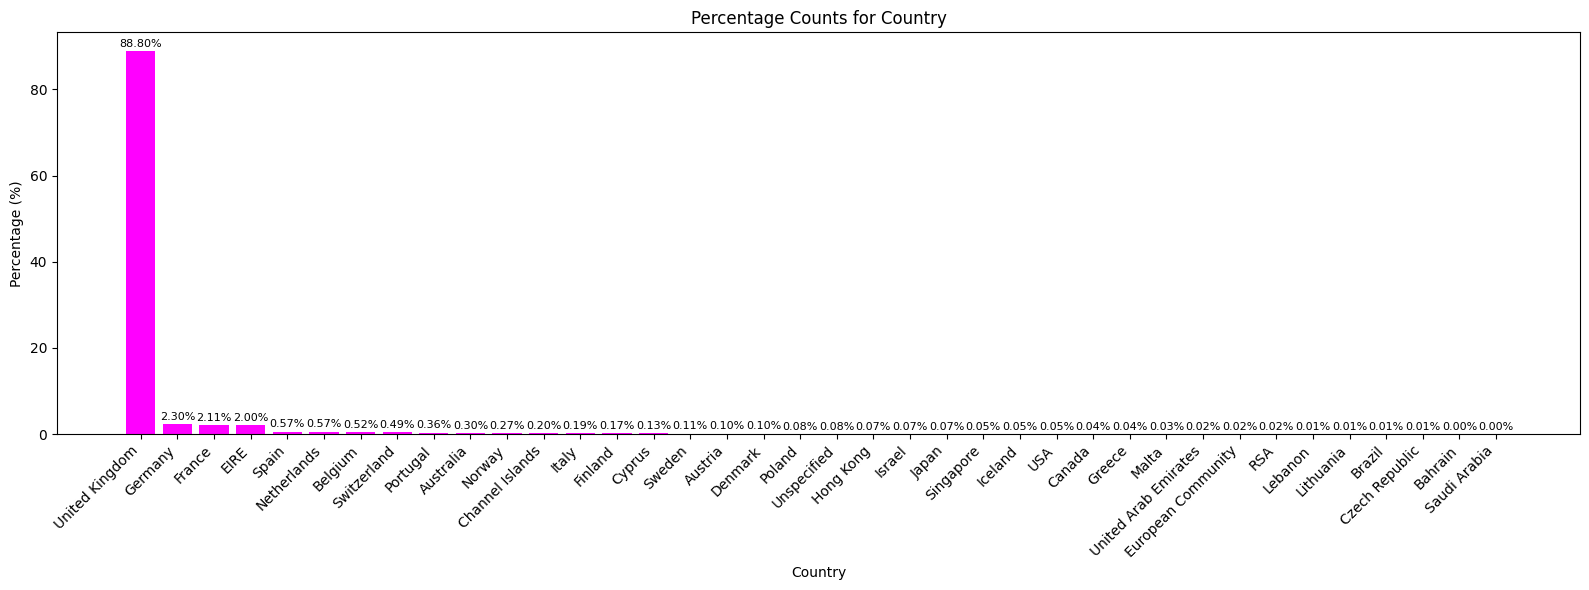

In [50]:
country_counts = df_eda.Country.value_counts()
total = country_counts.sum()
percent = (country_counts / total) * 100
plt.figure(figsize = (16,6))
bars = plt.bar(country_counts.index, percent.values, color = 'magenta')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Percentage Counts for Country')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [51]:
country_percent_list = [f'{country:<20} {count:>7} ({percentage:.2f}%)' 
                        for country, count, percentage in zip(country_counts.index, country_counts.values, percent.values)]

for item in country_percent_list:
    print(item)

United Kingdom        335204 (88.80%)
Germany                 8672 (2.30%)
France                  7962 (2.11%)
EIRE                    7545 (2.00%)
Spain                   2164 (0.57%)
Netherlands             2159 (0.57%)
Belgium                 1963 (0.52%)
Switzerland             1859 (0.49%)
Portugal                1355 (0.36%)
Australia               1117 (0.30%)
Norway                  1027 (0.27%)
Channel Islands          738 (0.20%)
Italy                    708 (0.19%)
Finland                  641 (0.17%)
Cyprus                   494 (0.13%)
Sweden                   409 (0.11%)
Austria                  380 (0.10%)
Denmark                  374 (0.10%)
Poland                   318 (0.08%)
Unspecified              294 (0.08%)
Hong Kong                274 (0.07%)
Israel                   256 (0.07%)
Japan                    253 (0.07%)
Singapore                207 (0.05%)
Iceland                  182 (0.05%)
USA                      176 (0.05%)
Canada                   145 (0.04%)


**About 89% Consumers are from United Kingdom.**

## Plotting the graph Month wise

In [52]:
df_eda.Month.value_counts()

Month
11    57741
12    43625
10    43551
9     37535
5     27101
7     26930
8     25991
3     25705
6     25660
1     23636
4     20870
2     19122
Name: count, dtype: int64

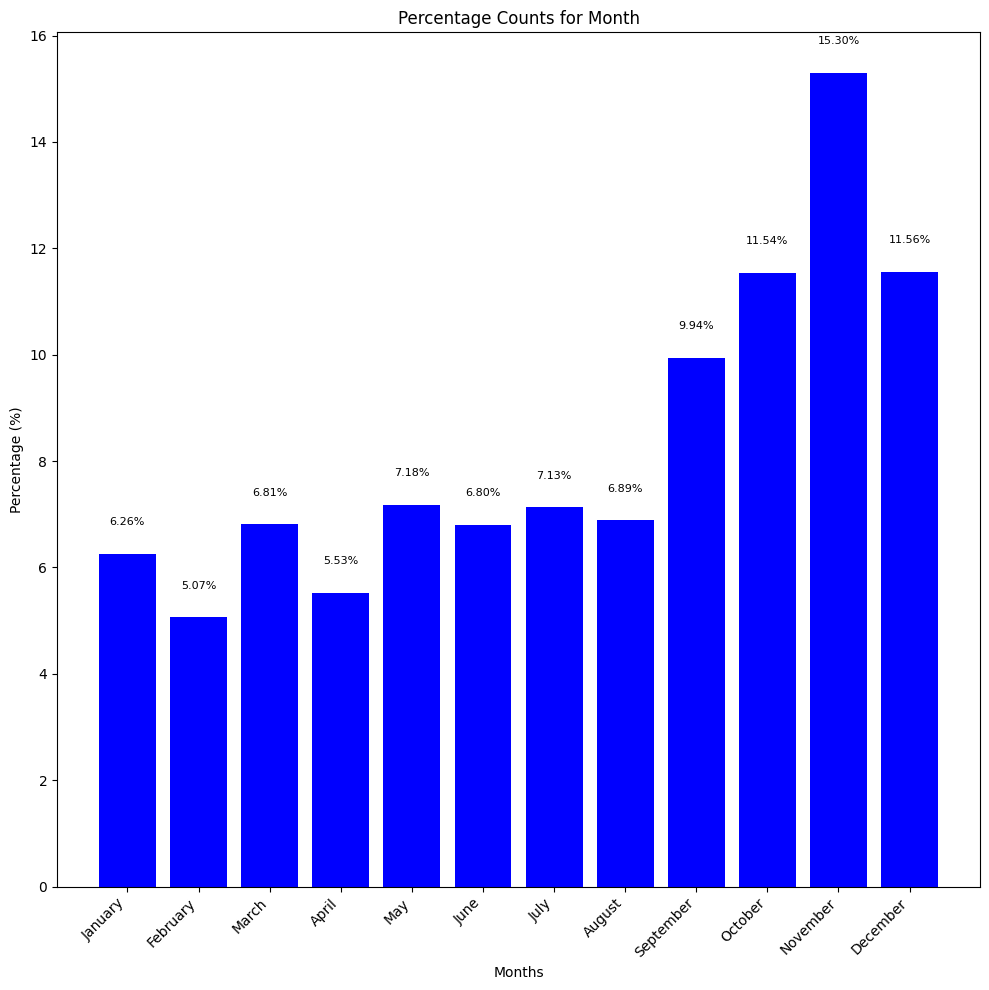

In [53]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

mon_counts = df_eda.Month.value_counts().sort_index()
total = mon_counts.sum()
percent = (mon_counts / total) * 100
plt.figure(figsize = (10,10))
bars = plt.bar(mon_counts.index, percent.values, color = 'blue')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)
    
plt.xticks(ticks=mon_counts.index, labels=[month_names[i-1] for i in mon_counts.index], rotation=45, ha='right')

plt.title('Percentage Counts for Month')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

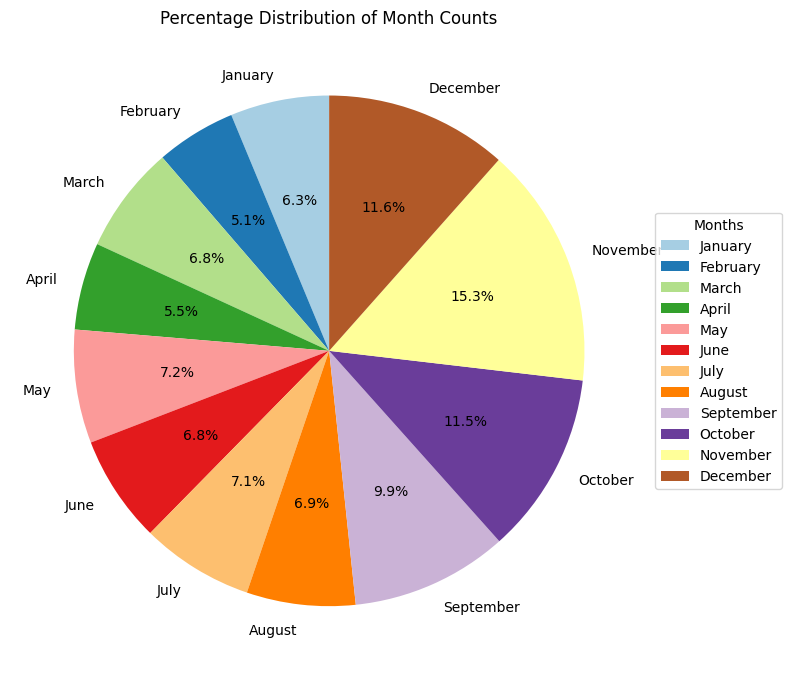

In [54]:
plt.figure(figsize=(8, 8))
plt.pie(percent, labels=[month_names[i-1] for i in mon_counts.index], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.legend([month_names[i-1] for i in mon_counts.index], title="Months", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Percentage Distribution of Month Counts')

plt.tight_layout()
plt.show()

**16.2% customers made the purchase in November.**
**About 50% purchase was made in last 4 months of the year.**

## Histogram and Density Plot for Unit Price Column

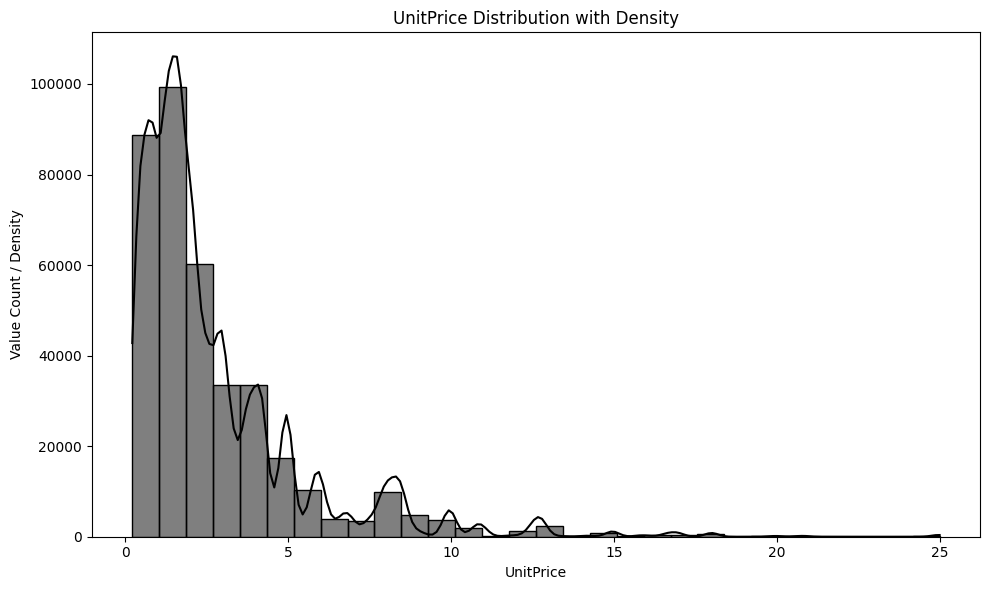

In [55]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df_eda['UnitPrice'], bins=30, color='black', kde=True, edgecolor='black')
plt.title('UnitPrice Distribution with Density')
plt.xlabel('UnitPrice')
plt.ylabel('Value Count / Density')
plt.tight_layout()
plt.show()

### Insights from UnitPrice Distribution

- The distribution of `UnitPrice` is **highly right-skewed**, with most transactions occurring at **lower price ranges**.
- **Majority** of items have unit prices close to **0**, indicating that lower-priced products dominate the dataset.
- There are **few transactions** with higher unit prices, particularly beyond **20**, suggesting **rare occurrences** of high-value items.
- A small number of **outliers** can be observed in the higher price range (30-50), which may warrant further investigation.
- The skewed nature of the data suggests that **data transformation** (e.g., log transformation) might be necessary for further analysis or predictive modeling.


In [56]:
total_count = df_eda['UnitPrice'].count()
below_10_count = df_eda[df_eda['UnitPrice'] < 10]['UnitPrice'].count()
percentage_below_10 = (below_10_count / total_count) * 100
print(f"Percentage of UnitPrice values below 10: {percentage_below_10:.2f}%")

Percentage of UnitPrice values below 10: 97.73%


## Invoices with most products

In [57]:
invoice_counts = df_eda['InvoiceNo'].value_counts().nlargest(10)
total_invoices = df_eda['InvoiceNo'].count()
invoice_percent = (invoice_counts / total_invoices) * 100

invoice_percent_list = [f'{invoice:<20} {count:>7} ({percentage:.2f}%)' 
                        for invoice, count, percentage in zip(invoice_counts.index, invoice_counts.values, invoice_percent.values)]

for item in invoice_percent_list:
    print(item)

573585                   666 (0.18%)
558475                   421 (0.11%)
581219                   398 (0.11%)
581492                   395 (0.10%)
580729                   370 (0.10%)
579777                   346 (0.09%)
567183                   341 (0.09%)
576339                   338 (0.09%)
581217                   334 (0.09%)
580115                   334 (0.09%)


## Most Frequently Sold Products

In [58]:
stockcode_counts = df_eda['StockCode'].value_counts().nlargest(10)
total_stockcodes = df_eda['StockCode'].count()
stockcode_percent = (stockcode_counts / total_stockcodes) * 100

stockcode_percent_list = [f'{stockcode:<20} {count:>7} ({percentage:.2f}%)' 
                          for stockcode, count, percentage in zip(stockcode_counts.index, stockcode_counts.values, stockcode_percent.values)]

for item in stockcode_percent_list:
    print(item)

85123A                  2019 (0.53%)
85099B                  1845 (0.49%)
47566                   1485 (0.39%)
84879                   1463 (0.39%)
22423                   1397 (0.37%)
22197                   1329 (0.35%)
20725                   1322 (0.35%)
21212                   1106 (0.29%)
23203                   1088 (0.29%)
22720                   1080 (0.29%)


## Most Frequent Customers

In [59]:
stockcode_counts = df_eda['CustomerID'].value_counts().nlargest(10)
total_stockcodes = df_eda['CustomerID'].count()
stockcode_percent = (stockcode_counts / total_stockcodes) * 100

stockcode_percent_list = [f'{stockcode:<20} {count:>7} ({percentage:.2f}%)' 
                          for stockcode, count, percentage in zip(stockcode_counts.index, stockcode_counts.values, stockcode_percent.values)]

for item in stockcode_percent_list:
    print(item)

14911.0                 5412 (1.69%)
17841.0                 3476 (1.09%)
14096.0                 2741 (0.86%)
12748.0                 2233 (0.70%)
14646.0                 1901 (0.59%)
13089.0                 1807 (0.56%)
15311.0                 1745 (0.55%)
14298.0                 1527 (0.48%)
14156.0                 1343 (0.42%)
13263.0                 1049 (0.33%)


## High Spending Customers

In [60]:
df_eda['TotalSpend'] = df_eda['UnitPrice'] * df_eda['Quantity']
customer_spend = df_eda.groupby('CustomerID')['TotalSpend'].sum()
top_10_customers = customer_spend.nlargest(10)
total_spending = customer_spend.sum()
customer_percent = (top_10_customers / total_spending) * 100

top_customers_list = [f'{customer:<20} {spend:>10.2f} ({percentage:.2f}%)' 
                      for customer, spend, percentage in zip(top_10_customers.index, top_10_customers.values, customer_percent.values)]

for item in top_customers_list:
    print(item)

14646.0               263038.53 (3.42%)
18102.0               210719.04 (2.74%)
14911.0               133961.67 (1.74%)
12415.0               118381.02 (1.54%)
14156.0               114545.11 (1.49%)
17450.0               103863.19 (1.35%)
17511.0                90303.05 (1.17%)
13694.0                62255.01 (0.81%)
16684.0                60148.04 (0.78%)
15311.0                58681.41 (0.76%)
